In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [3]:
df = pd.read_csv('bank.csv', sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.shape

(41188, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


In [28]:
cat_col = df.select_dtypes(include=['object', 'bool'])
print(cat_col.shape)
cat_col

(41188, 11)


,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...
41183,retired,married,professional.course,no,yes,no,cellular,nov,fri,nonexistent,yes
41184,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,no
41185,retired,married,university.degree,no,yes,no,cellular,nov,fri,nonexistent,no
41186,technician,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,yes


In [27]:
# checking the values of categorical column

In [10]:
for col in cat_col:
    print(col, "(", len(df[col].unique()) , "values):\n", np.sort(df[col].unique()), '\n')

job ( 12 values):
 ['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed' 'unknown'] 

marital ( 4 values):
 ['divorced' 'married' 'single' 'unknown'] 

education ( 8 values):
 ['basic.4y' 'basic.6y' 'basic.9y' 'high.school' 'illiterate'
 'professional.course' 'university.degree' 'unknown'] 

default ( 3 values):
 ['no' 'unknown' 'yes'] 

housing ( 3 values):
 ['no' 'unknown' 'yes'] 

loan ( 3 values):
 ['no' 'unknown' 'yes'] 

contact ( 2 values):
 ['cellular' 'telephone'] 

month ( 10 values):
 ['apr' 'aug' 'dec' 'jul' 'jun' 'mar' 'may' 'nov' 'oct' 'sep'] 

day_of_week ( 5 values):
 ['fri' 'mon' 'thu' 'tue' 'wed'] 

poutcome ( 3 values):
 ['failure' 'nonexistent' 'success'] 

y ( 2 values):
 ['no' 'yes'] 



In [12]:
for col in cat_col:
    print(f"\033[1m\033[94m{col} \n{20 * '-'}\033[0m")    
    print(df[col].value_counts(), "\n")
    
print(df.nunique(axis=1))

job 
--------------------
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64 

marital 
--------------------
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64 

education 
--------------------
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64 

default 
--------------------
no         32588
unknown     8597
yes            3
Name: default, dtype: int64 

housing 
--------------------
yes        21576
no         18622
unknown      990
Name: housing, dtype: int64 

loan 
----------------

In [ ]:
# data visualization of categorical variables

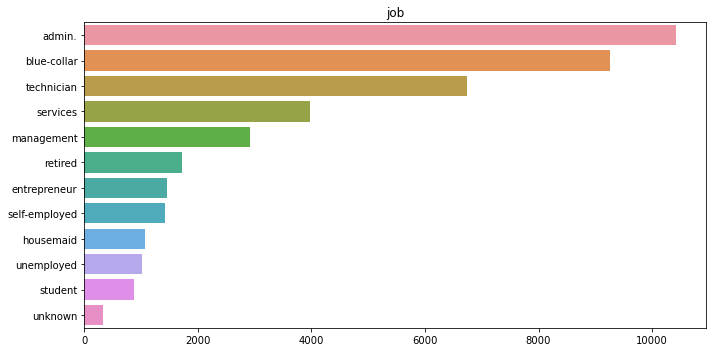

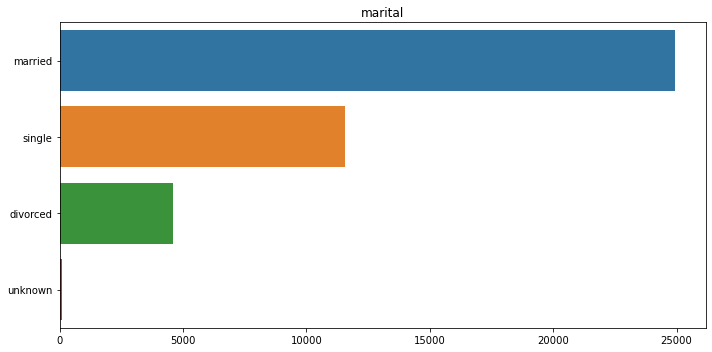

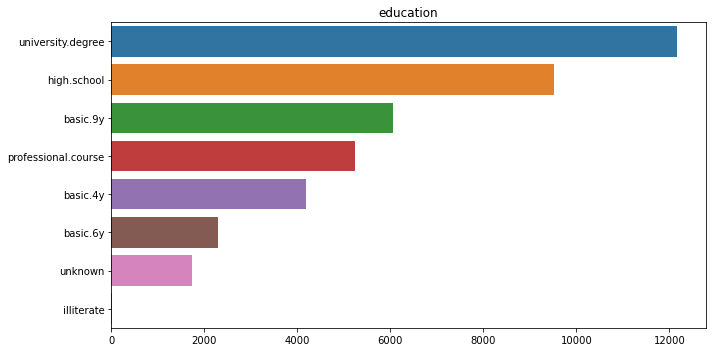

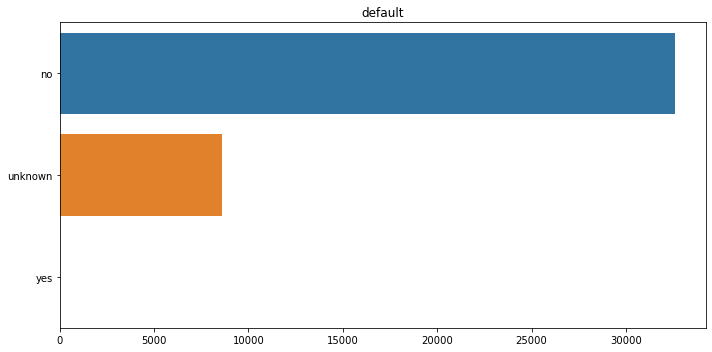

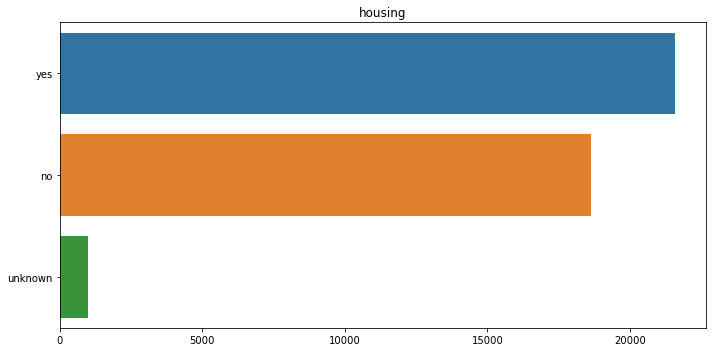

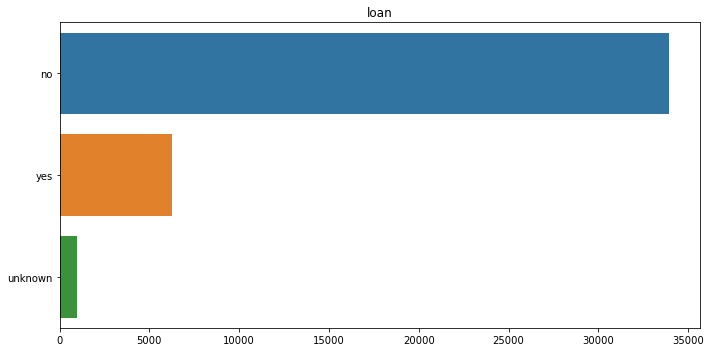

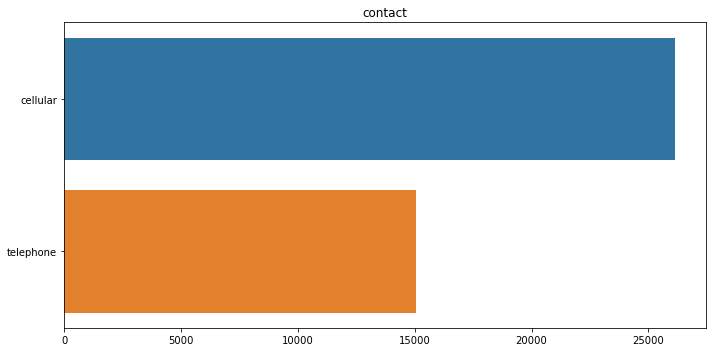

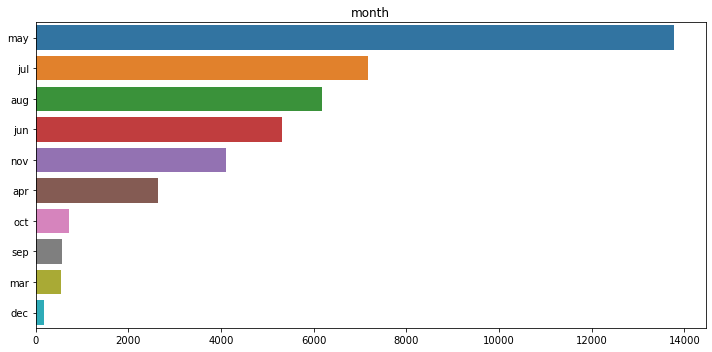

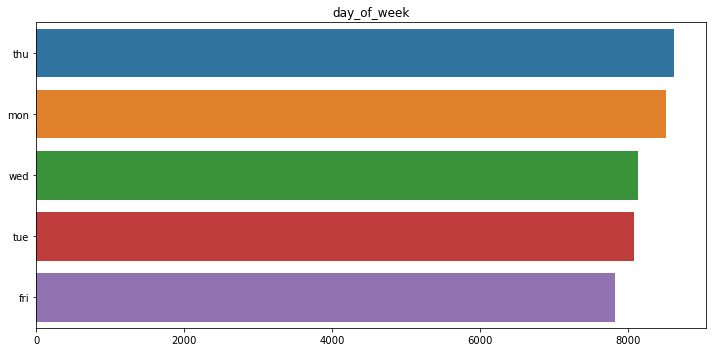

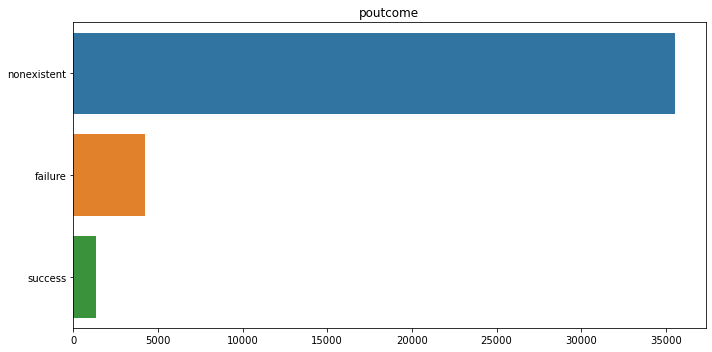

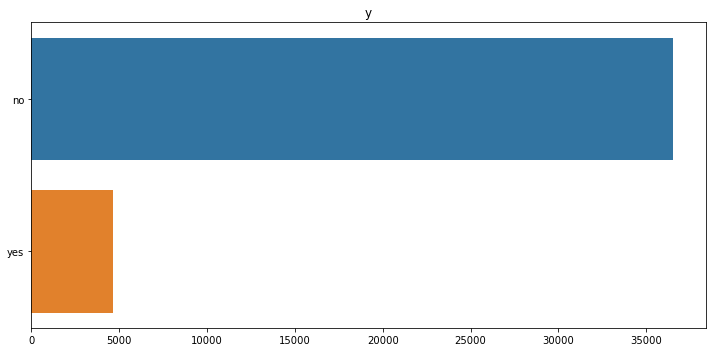

In [18]:
for col in cat_col:
    plt.figure(figsize=(10,5))    
    sns.barplot(x = df[col].value_counts().values, y = df[col].value_counts().index, data=df)    
    plt.title(col)    
    plt.tight_layout()

In [ ]:
# Subscription to the term deposit

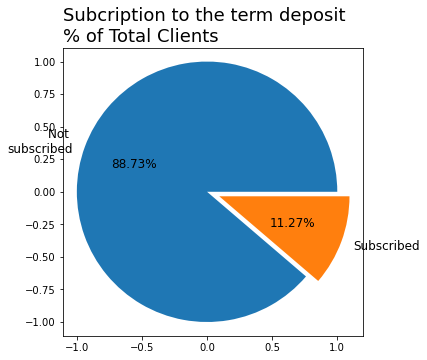

In [21]:

labels = ["Not \nsubscribed", "Subscribed"]
explode = (0, 0.1) 


fig = plt.figure() 
ax = fig.add_axes([0,0,1,1]) 

ax.pie(df['y'].value_counts(), 
       labels = labels,
       explode = explode,
       autopct ='%1.2f%%',
       frame = True,
       textprops = dict(color ="black", size=12)) 

#ax.axis('equal') 
plt.title('Subcription to the term deposit\n% of Total Clients',
     loc='left',
     color = 'black', 
     fontsize = '18')

plt.show()

## Q1
What does the primary analysis of several categorical
features reveal?

## Q2
Perform the following Exploratory Data Analysis tasks:


a. Missing Value Analysis

b. Label Encoding wherever required

c. Selecting important features based on Random Forest

d. Handling unbalanced data using SMOTE

e. Standardize the data using the anyone of the scalers provided by sklearn


In [24]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

### a) Handling missing values
no missing values

In [ ]:
# Although "duration" feature highly affects the output target, this value is not known before a call is performed.
# Hence; this feature should been discarded from the list of features to predict

In [25]:
df = df.drop(['duration'], axis=1)

### b) Label Encoding the cat variables



In [29]:
from sklearn.preprocessing import LabelEncoder


In [33]:
cols=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome','y']

In [34]:
df1=df.copy()
df1[cols] = df1[cols].apply(LabelEncoder().fit_transform)

In [37]:
df1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [38]:
df1.dtypes

age                 int64
job                 int32
marital             int32
education           int32
default             int32
housing             int32
loan                int32
contact             int32
month               int32
day_of_week         int32
campaign            int64
pdays               int64
previous            int64
poutcome            int32
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                   int32
dtype: object

In [ ]:
# all categorical columns have been encoded.

### c) Selecting important features based on Random Forest

In [39]:
x=df1.drop(['y'],axis=1)
y=df1.y

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier



In [48]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [49]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier())

In [50]:
sel.get_support()

array([ True,  True, False,  True, False, False, False, False, False,
        True,  True, False, False, False, False, False, False,  True,
       False])

In [52]:
selected_feat= X_train.columns[(sel.get_support())]
print(len(selected_feat))
print(selected_feat)


6
Index(['age', 'job', 'education', 'day_of_week', 'campaign', 'euribor3m'], dtype='object')


In [ ]:
# The above selected_feat contains the important features

### d) Handling unbalanced data using SMOTE


In [ ]:
# oversampling

In [54]:
pip install imblearn


  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.2
    Uninstalling scikit-learn-0.24.2:
      Successfully uninstalled scikit-learn-0.24.2


In [106]:
from imblearn.over_sampling import SMOTE

# summarize class distribution
counter = Counter(y_train)
print(counter)

# transform the dataset
oversample = SMOTE()
X_train_smote, y_train = oversample.fit_resample(X_train_t, y_train)

# summarize the new class distribution
counter = Counter(y_train)
print(counter)

ImportError: cannot import name '_ClassNamePrefixFeaturesOutMixin' from 'sklearn.base' (C:\Users\91988\anaconda3\lib\site-packages\sklearn\base.py)

In [56]:
df1['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [ ]:
# unable to import smote from imblearn due to some technical fault.

### e) Standardize the data using the anyone of the scalers provided by sklearn

In [63]:
# using standscaler
from sklearn.preprocessing import StandardScaler    

In [64]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train= scaler.fit_transform(X_train)    
X_test= scaler.transform(X_test) 

In [66]:
X_test

array([[-0.09347639, -0.75706876, -0.2865168 , ..., -0.47524957,
         0.76944271,  0.84412727],
       [ 1.44039827, -0.75706876, -0.2865168 , ..., -1.4250539 ,
        -1.27847771, -0.9370942 ],
       [-0.09347639, -0.75706876, -0.2865168 , ..., -0.28097141,
         0.77174893,  0.84412727],
       ...,
       [ 0.28999228,  0.9115596 , -0.2865168 , ..., -1.23077574,
        -1.36784361, -0.9370942 ],
       [-0.09347639, -0.20085931, -0.2865168 , ...,  0.88469754,
         0.71236385,  0.3318535 ],
       [ 0.57759377, -1.03517349, -0.2865168 , ...,  0.94945692,
         0.77405515,  0.84412727]])

## Q3
Build the following Supervised Learning models:

a. Logistic Regression

b. AdaBoost

c. Naïve Bayes

d. KNN

e. SVM

### a) Logistic Regression

In [85]:
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression()
model1.fit(X_train,y_train)

LogisticRegression()

In [86]:
print('Train Score:', model1.score(X_train,y_train)*100)
print('Test Score :', model1.score(X_test,y_test)*100)

Train Score: 90.08012209080503
Test Score : 89.8357206441693


In [87]:
y_pred_log1 = model1.predict(X_test)

### b) AdaBoost 

In [76]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators=50,learning_rate=1)

In [89]:
model2 = abc.fit(X_train, y_train)

In [90]:
print('Train Score:', model2.score(X_train,y_train)*100)
print('Test Score :', model2.score(X_test,y_test)*100)

Train Score: 90.05584266934896
Test Score : 89.9813870680586


In [91]:
y_pred_log2 = model2.predict(X_test)

### d) KNN

In [93]:
from sklearn.neighbors import KNeighborsClassifier
model4 = KNeighborsClassifier(n_neighbors= 6 )
model4.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=6)

In [94]:
print('Train Score:', model4.score(X_train,y_train)*100)
print('Test Score :', model4.score(X_test,y_test)*100)

Train Score: 90.97152370712081
Test Score : 89.70623937848993


In [95]:
y_pred_log4 = model4.predict(X_test)

### e) SVM

In [105]:
from sklearn import svm
model5=svm.SVC(kernel='linear')
model5.fit(X_train,y_train)

SVC(kernel='linear')

In [107]:
print('Train Score:', model5.score(X_train,y_train)*100)
print('Test Score :', model5.score(X_test,y_test)*100)

Train Score: 89.81998543234712
Test Score : 89.59294327102047


In [110]:
y_pred_log5 = model5.predict(X_test)

### Q4. Tabulate the performance metrics of all the above models and tell which model performs better in predicting if the client will subscribe to term deposit or not


In [111]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

In [113]:
roc1=roc_auc_score(y_test, y_pred_log1)
acc1 = accuracy_score(y_test, y_pred_log1)
prec1 = precision_score(y_test, y_pred_log1)
rec1 = recall_score(y_test, y_pred_log1)
f11 = f1_score(y_test, y_pred_log1)

In [114]:
roc2=roc_auc_score(y_test, y_pred_log2)
acc2 = accuracy_score(y_test, y_pred_log2)
prec2 = precision_score(y_test, y_pred_log2)
rec2 = recall_score(y_test, y_pred_log2)
f12 = f1_score(y_test, y_pred_log2)

In [117]:
roc3=roc_auc_score(y_test, y_pred_log3)
acc3 = accuracy_score(y_test, y_pred_log3)
prec3 = precision_score(y_test, y_pred_log3)
rec3 = recall_score(y_test, y_pred_log3)
f13 = f1_score(y_test, y_pred_log3)

In [118]:
roc4=roc_auc_score(y_test, y_pred_log4)
acc4 = accuracy_score(y_test, y_pred_log4)
prec4 = precision_score(y_test, y_pred_log4)
rec4 = recall_score(y_test, y_pred_log4)
f14 = f1_score(y_test, y_pred_log4)

In [119]:
roc5=roc_auc_score(y_test, y_pred_log5)
acc5 = accuracy_score(y_test, y_pred_log5)
prec5 = precision_score(y_test, y_pred_log5)
rec5 = recall_score(y_test, y_pred_log5)
f15 = f1_score(y_test, y_pred_log5)

In [120]:
results = pd.DataFrame([['Logistic Regression', acc1,prec1,rec1, f11,roc1],['AdaBoost', acc2,prec2,rec2, f12,roc2],['Naïve Bayes', acc3,prec3,rec3, f13,roc3],['KNN', acc4,prec4,rec4, f14,roc4],['SVM', acc5,prec5,rec5, f15,roc5]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

In [121]:
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.898357,0.647982,0.208213,0.315158,0.596950
1,AdaBoost,0.899814,0.669683,0.213256,0.323497,0.599973
2,Naïve Bayes,0.897062,0.621339,0.213977,0.318328,0.598738
3,KNN,0.897062,0.621339,0.213977,0.318328,0.598738
4,SVM,0.895929,0.612335,0.200288,0.301846,0.592121


# Conclusion:

# Part II: Time Series

In [ ]:
#import necessary libraries

In [122]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.stattools import adfuller

In [123]:
df = pd.read_csv("MonthWiseMarketArrivals_clean.csv")
df

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,January-2005
1,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,January-2006
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,January-2010
3,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,January-2011
4,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,January-2012
...,...,...,...,...,...,...,...,...,...,...
10222,YEOLA(MS),December,2011,131326,282,612,526,MS,YEOLA,December-2011
10223,YEOLA(MS),December,2012,207066,485,1327,1136,MS,YEOLA,December-2012
10224,YEOLA(MS),December,2013,215883,472,1427,1177,MS,YEOLA,December-2013
10225,YEOLA(MS),December,2014,201077,446,1654,1456,MS,YEOLA,December-2014


In [ ]:
# understanding the data

In [124]:
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,January-2005
1,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,January-2006
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,January-2010
3,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,January-2011
4,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,January-2012


In [125]:
df.tail()


,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
10222,YEOLA(MS),December,2011,131326,282,612,526,MS,YEOLA,December-2011
10223,YEOLA(MS),December,2012,207066,485,1327,1136,MS,YEOLA,December-2012
10224,YEOLA(MS),December,2013,215883,472,1427,1177,MS,YEOLA,December-2013
10225,YEOLA(MS),December,2014,201077,446,1654,1456,MS,YEOLA,December-2014
10226,YEOLA(MS),December,2015,223315,609,1446,1126,MS,YEOLA,December-2015


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10227 entries, 0 to 10226
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   market    10227 non-null  object
 1   month     10227 non-null  object
 2   year      10227 non-null  int64 
 3   quantity  10227 non-null  int64 
 4   priceMin  10227 non-null  int64 
 5   priceMax  10227 non-null  int64 
 6   priceMod  10227 non-null  int64 
 7   state     10227 non-null  object
 8   city      10227 non-null  object
 9   date      10227 non-null  object
dtypes: int64(5), object(5)
memory usage: 799.1+ KB


In [128]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,10227.0,2009.022294,4.372841,1996.0,2006.0,2009.0,2013.0,2016.0
quantity,10227.0,76604.880023,124408.698759,20.0,8898.0,27460.0,88356.5,1639032.0
priceMin,10227.0,646.944363,673.121850,16.0,209.0,440.0,828.0,6000.0
priceMax,10227.0,1212.760731,979.658874,145.0,557.0,923.0,1527.0,8192.0
priceMod,10227.0,984.284345,818.471498,80.0,448.0,747.0,1248.0,6400.0


In [129]:
df.dtypes

market      object
month       object
year         int64
quantity     int64
priceMin     int64
priceMax     int64
priceMod     int64
state       object
city        object
date        object
dtype: object

## Preparation of the data

### Q1) Get the modal price of onion for each month for the Mumbai market 

In [130]:
mumb=df.loc[df.city == "MUMBAI"]
mumb

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
6654,MUMBAI,January,2004,267100,719,971,849,MS,MUMBAI,January-2004
6655,MUMBAI,January,2005,275845,261,513,387,MS,MUMBAI,January-2005
6656,MUMBAI,January,2006,228000,315,488,402,MS,MUMBAI,January-2006
6657,MUMBAI,January,2007,205200,866,1136,997,MS,MUMBAI,January-2007
6658,MUMBAI,January,2008,267550,348,550,448,MS,MUMBAI,January-2008
...,...,...,...,...,...,...,...,...,...,...
6795,MUMBAI,December,2011,290350,519,994,749,MS,MUMBAI,December-2011
6796,MUMBAI,December,2012,218500,1048,1609,1330,MS,MUMBAI,December-2012
6797,MUMBAI,December,2013,226385,1298,1976,1639,MS,MUMBAI,December-2013
6798,MUMBAI,December,2014,294150,1433,2178,1802,MS,MUMBAI,December-2014


In [131]:
mop=pd.concat([mumb.date,mumb.priceMod],axis=1)

In [132]:
mop.set_index('date')

,priceMod
date,
January-2004,849
January-2005,387
January-2006,402
January-2007,997
January-2008,448
...,...
December-2011,749
December-2012,1330
December-2013,1639


In [133]:
df.date = pd.DatetimeIndex(df.date)

In [134]:
df.index = pd.PeriodIndex(df.date, freq="M")
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
date,,,,,,,,,,
2005-01,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,2005-01-01
2006-01,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,2006-01-01
2010-01,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,2010-01-01
2011-01,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,2011-01-01
2012-01,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,2012-01-01


### Q2) Build time series model and check the performance of the model using RMSE

### Linear Model

In [136]:
df_mumb = df.loc[df.city == "MUMBAI"].copy()
df_mumb.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
date,,,,,,,,,,
2004-01,MUMBAI,January,2004,267100,719,971,849,MS,MUMBAI,2004-01-01
2005-01,MUMBAI,January,2005,275845,261,513,387,MS,MUMBAI,2005-01-01
2006-01,MUMBAI,January,2006,228000,315,488,402,MS,MUMBAI,2006-01-01
2007-01,MUMBAI,January,2007,205200,866,1136,997,MS,MUMBAI,2007-01-01
2008-01,MUMBAI,January,2008,267550,348,550,448,MS,MUMBAI,2008-01-01


In [137]:
df_mumb = df_mumb.drop(["market","month","year","priceMin","priceMax","state","city"], axis=1)
df_mumb.head()

,quantity,priceMod,date
date,,,
2004-01,267100,849,2004-01-01
2005-01,275845,387,2005-01-01
2006-01,228000,402,2006-01-01
2007-01,205200,997,2007-01-01
2008-01,267550,448,2008-01-01


<AxesSubplot:ylabel='Frequency'>

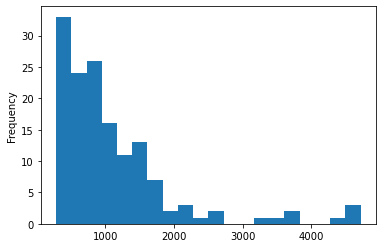

In [140]:
df_mumb.priceMod.plot(kind="hist", bins=20)

<AxesSubplot:ylabel='Frequency'>

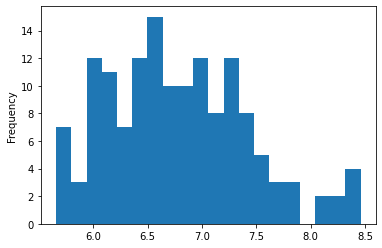

In [141]:
df_mumb["log_priceMod"] = np.log(df_mumb.priceMod)
df_mumb.log_priceMod.plot(kind="hist", bins=20)

In [ ]:
# The above histogram is more look like normal distribution

In [138]:
df_mumb["log_priceMod"] = np.log(df_mumb.priceMod)

In [142]:
df_mumb_mean = df_mumb.log_priceMod.mean()
df_mumb["mean_price"] = np.exp(df_mumb_mean)

In [143]:
df_mumb["timeindex"] = df_mumb.date - df_mumb.date.min()
df_mumb.head()

,quantity,priceMod,date,log_priceMod,mean_price,timeindex
date,,,,,,
2004-01,267100,849,2004-01-01,6.744059,889.100239,0 days
2005-01,275845,387,2005-01-01,5.958425,889.100239,366 days
2006-01,228000,402,2006-01-01,5.996452,889.100239,731 days
2007-01,205200,997,2007-01-01,6.904751,889.100239,1096 days
2008-01,267550,448,2008-01-01,6.104793,889.100239,1461 days


In [144]:
df_mumb["timeindex"] = df_mumb["timeindex"]/np.timedelta64(1,"M")
df_mumb.head()

,quantity,priceMod,date,log_priceMod,mean_price,timeindex
date,,,,,,
2004-01,267100,849,2004-01-01,6.744059,889.100239,0.000000
2005-01,275845,387,2005-01-01,5.958425,889.100239,12.024888
2006-01,228000,402,2006-01-01,5.996452,889.100239,24.016920
2007-01,205200,997,2007-01-01,6.904751,889.100239,36.008953
2008-01,267550,448,2008-01-01,6.104793,889.100239,48.000986


In [145]:
df_mumb["timeindex"] = df_mumb["timeindex"].round(0).astype(int)
df_mumb.tail()

,quantity,priceMod,date,log_priceMod,mean_price,timeindex
date,,,,,,
2011-12,290350,749,2011-12-01,6.618739,889.100239,95
2012-12,218500,1330,2012-12-01,7.192934,889.100239,107
2013-12,226385,1639,2013-12-01,7.401842,889.100239,119
2014-12,294150,1802,2014-12-01,7.496652,889.100239,131
2015-12,302409,1542,2015-12-01,7.340836,889.100239,143


In [146]:
linear_model = smf.ols('log_priceMod ~ timeindex', data = df_mumb).fit()
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           log_priceMod   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.469
Method:                 Least Squares   F-statistic:                     129.3
Date:                Mon, 23 May 2022   Prob (F-statistic):           8.89e-22
Time:                        17:56:28   Log-Likelihood:                -96.121
No. Observations:                 146   AIC:                             196.2
Df Residuals:                     144   BIC:                             202.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.0284      0.078     77.785      0.000       5.875       6.182
timeindex      0.0105      0.001     11.370      0.000       0.009       0.012
==============================================================================
Omnibus:                        7.658   Durbin-Watson:                   1.795
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                8.054
Skew:                           0.566   Prob(JB):                       0.0178
Kurtosis:                       2.791   Cond. No.                         167.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [147]:
linear_model_pred = linear_model.predict()
linear_model_pred

array([6.02841087, 6.15450176, 6.28059265, 6.40668353, 6.53277442,
       6.65886531, 6.7849562 , 6.91104708, 7.03713797, 7.16322886,
       7.28931975, 7.41541064, 7.54150152, 6.03891844, 6.16500933,
       6.29110022, 6.41719111, 6.543282  , 6.66937288, 6.79546377,
       6.92155466, 7.04764555, 7.17373643, 7.29982732, 7.42591821,
       7.5520091 , 6.04942602, 6.17551691, 6.30160779, 6.42769868,
       6.55378957, 6.67988046, 6.80597134, 6.93206223, 7.05815312,
       7.18424401, 7.3103349 , 7.43642578, 6.05993359, 6.18602448,
       6.31211537, 6.43820626, 6.56429714, 6.69038803, 6.81647892,
       6.94256981, 7.06866069, 7.19475158, 7.32084247, 7.44693336,
       6.07044117, 6.19653205, 6.32262294, 6.44871383, 6.57480472,
       6.70089561, 6.82698649, 6.95307738, 7.07916827, 7.20525916,
       7.33135004, 7.45744093, 6.08094874, 6.20703963, 6.33313052,
       6.4592214 , 6.58531229, 6.71140318, 6.83749407, 6.96358495,
       7.08967584, 7.21576673, 7.34185762, 7.46794851, 6.09145

In [148]:
df_mumb["linear_price"] = np.exp(linear_model_pred)
df_mumb.head()

,quantity,priceMod,date,log_priceMod,mean_price,timeindex,linear_price
date,,,,,,,
2004-01,267100,849,2004-01-01,6.744059,889.100239,0,415.054929
2005-01,275845,387,2005-01-01,5.958425,889.100239,12,470.832196
2006-01,228000,402,2006-01-01,5.996452,889.100239,24,534.105105
2007-01,205200,997,2007-01-01,6.904751,889.100239,36,605.880962
2008-01,267550,448,2008-01-01,6.104793,889.100239,48,687.302435


In [149]:
model_linear_forecast_manual = 0.0093 * 146 + 6.1121
model_linear_forecast_manual

7.4699

In [150]:
def RMSE(actual, predicted):
    mse = (actual - predicted)**2
    rmse = np.sqrt(mse.sum()/mse.count())
    return rmse

In [151]:
linear_model_RMSE = RMSE(df_mumb.priceMod, df_mumb.linear_price)
linear_model_RMSE

724.7073314178772

In [152]:
np.exp(model_linear_forecast_manual)

1754.4312336793307

In [ ]:
# tabulating the result

In [153]:
Result_df = pd.DataFrame(columns =["Model","Forcast","RMSE"])
Result_df.loc[0,"Model"] = "Linear Model"
Result_df.loc[0,"Forcast"] = np.exp(model_linear_forecast_manual)
Result_df.loc[0,"RMSE"] = linear_model_RMSE
Result_df

,Model,Forcast,RMSE
0,Linear Model,1754.431234,724.707331


### Thus we have build a time series model and checked the performance of the model using RMSE

### Q3. Plot ACF and PACF plots 

In [154]:
df_mumb["shift_log_priceMod"] = df_mumb.log_priceMod.shift()
df_mumb["log_priceMod_diff"] = df_mumb.log_priceMod - df_mumb.shift_log_priceMod

In [155]:
ts = df_mumb.log_priceMod
ts_diff = df_mumb.log_priceMod_diff
ts_diff.dropna(inplace = True)

In [156]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_diff, nlags=20)
lag_acf

C:\Users\91988\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


array([ 1.        , -0.54612312,  0.35974009, -0.48269918,  0.31064144,
       -0.28581108,  0.25488628, -0.17927192,  0.20121241, -0.38328221,
        0.23712336, -0.33378314,  0.65536578, -0.26709031,  0.18329631,
       -0.31617105,  0.16054614, -0.14311553,  0.12853298, -0.08896203,
        0.17512094])

### ACF Plot

<AxesSubplot:>

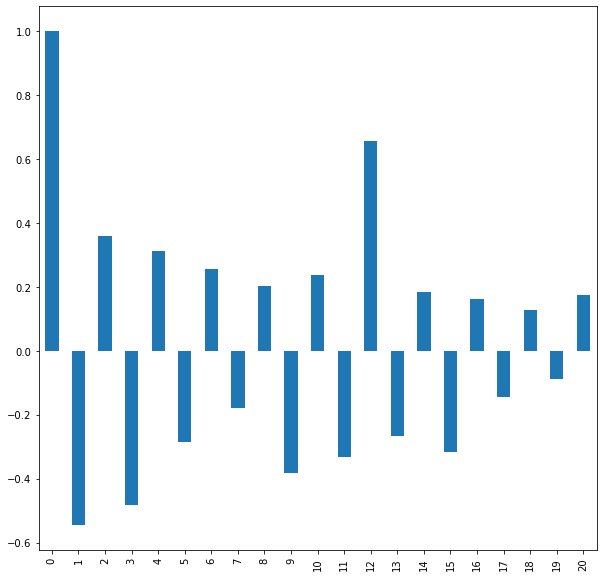

In [159]:
plt.figure(figsize=(10,10))
ACF = pd.Series(lag_acf)
ACF.plot(kind="bar")

### PACF plot

<AxesSubplot:>

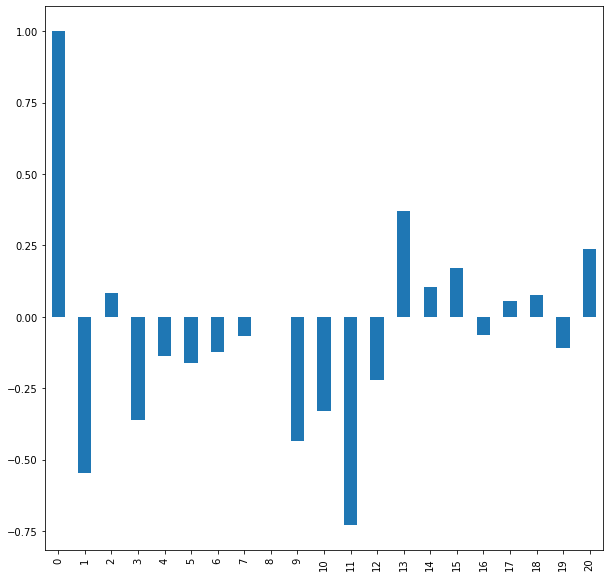

In [160]:
lag_pacf = pacf(ts_diff, nlags=20, method='ols')
plt.figure(figsize=(10,10))
PACF = pd.Series(lag_pacf)
PACF.plot(kind="bar")

### Thus we have plotted the ACF and PACF plots